# Data analysis of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals

In [40]:
# Import image module
from IPython.display import Image
import torch
import torch.nn as nn
# Get the image
Image(url="figures/banner.png")

## Load Modules and Preprocessing Functions

Read the current directory:

In [41]:
import os
print('The working directory is :{}'.format(os.getcwd()))

The working directory is :/Users/dhakal1/Documents/Project/DSSI-Challenge/data/tasks_3_4


Load libraries:

In [42]:
import sys
print("Python is in %s" % sys.executable)
print("Python version is %s.%s.%s" % sys.version_info[:3])
import glob
import re, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

Python is in /Library/Developer/CommandLineTools/usr/bin/python3
Python version is 3.9.6


The function ``read_data_dirs`` is needed to read the numpy arrays:

In [43]:
def read_data_dirs(dirs_names, verbose = 0):
    
    file_pairs = []
    
    for dir in dirs_names:    
        all_files = sorted(glob.glob(dir + '/*.npy'))
        files_Vm=[]
        files_pECG=[]
        
        if verbose > 0:
            print('Reading files...',end='')
        for file in all_files:
            if 'VmData' in file:
                files_Vm.append(file)
            if 'pECGData' in file:
                files_pECG.append(file)
        if verbose > 0:        
            print(' done.')
        
        if verbose > 0:
            print('len(files_pECG) : {}'.format(len(files_pECG)))
            print('len(files_Vm) : {}'.format(len(files_Vm)))
        
        for i in range(len(files_pECG)):  
            VmName =  files_Vm[i]
            VmName = VmName.replace('VmData', '')
            pECGName =  files_pECG[i]
            pECGName = pECGName.replace('pECGData', '')            
            if pECGName == VmName :
                file_pairs.append([files_pECG[i], files_Vm[i]])
            else:
                print('Automatic sorted not matching, looking for pairs ...',end='')
                for j in range(len(files_Vm)):
                    VmName =  files_Vm[j]
                    VmName = VmName.replace('VmData', '')
                    if pECGName == VmName :
                        file_pairs.append([files_pECG[i], files_Vm[j]])
                print('done.')       
    return file_pairs

## Load the dataset

In [44]:
os.chdir('/Users/dhakal1/Documents/Project/DSSI-Challenge/data/tasks_3_4')
data_dirs = []
regex = r'data_hearts_dd_0p2*'
for x in os.listdir('./'):
    if re.match(regex, x):
        data_dirs.append(x)
        
file_pairs = read_data_dirs(data_dirs)
len(file_pairs)

10512

## Plot one simulation

Case 213 : data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy


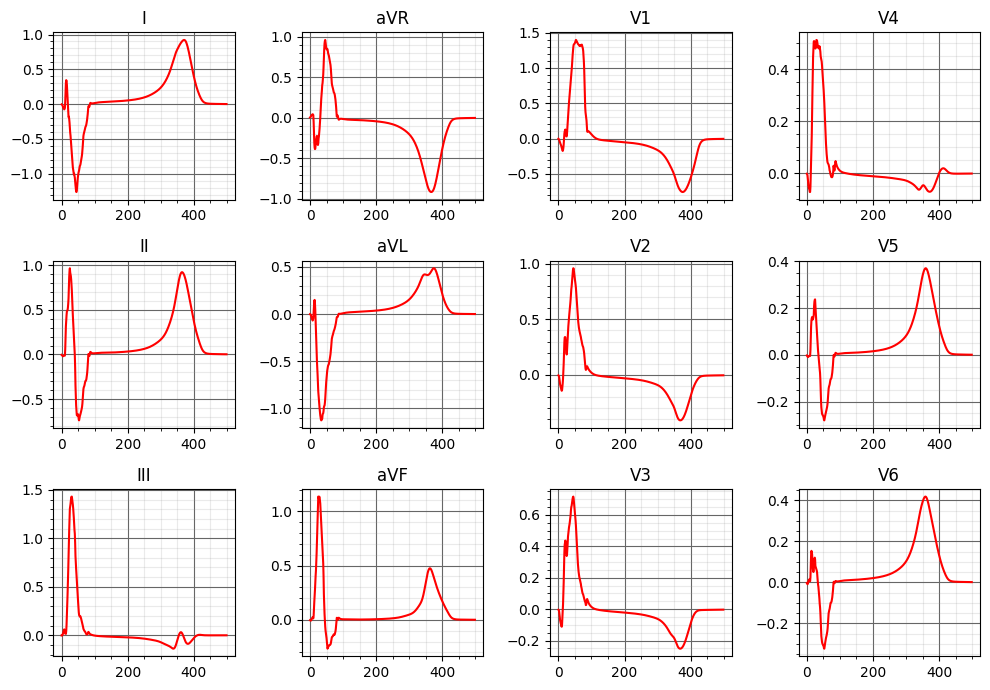

In [45]:
row = 3; column = 4
scaling_ecg = "none"
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]

row = 3; column = 4    
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12}

index = np.random.choice(range(len(file_pairs)),1)
index = [213]

for case in index:

    print('Case {} : {}'.format(case, file_pairs[case][0]))
    pECGData = np.load(file_pairs[case][0])
    VmData = np.load(file_pairs[case][1])
    
    dataECG = torch.Tensor(pECGData)               # dataECG  : RA LA LL RL V1 V2 V3 V4 V5 V6
    ecg12aux = torch.zeros(dataECG.shape[0],12)    # ecg12aux : i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6
    WilsonLead = 0.33333333 * (dataECG[:,0] + dataECG[:,1] + dataECG[:,2])           
    # Lead I: LA - RA
    ecg12aux[:,0] = dataECG[:,1] - dataECG[:,0]
    # Lead II: LL - RA
    ecg12aux[:,1] = dataECG[:,2] - dataECG[:,0]
    # Lead III: LL - LA
    ecg12aux[:,2] = dataECG[:,2] - dataECG[:,1]
    # Lead aVR: 3/2 (RA - Vw)
    ecg12aux[:,3] = 1.5*(dataECG[:,0] - WilsonLead)
    # Lead aVL: 3/2 (LA - Vw)
    ecg12aux[:,4] = 1.5*(dataECG[:,1] - WilsonLead)
    # Lead aVF: 3/2 (LL - Vw)
    ecg12aux[:,5] = 1.5*(dataECG[:,2] - WilsonLead)
    # Lead V1: V1 - Vw
    ecg12aux[:,6] = dataECG[:,4] - WilsonLead
    # Lead V2: V2 - Vw
    ecg12aux[:,7] = dataECG[:,5] - WilsonLead
    # Lead V3: V3 - Vw
    ecg12aux[:,8] = dataECG[:,6] - WilsonLead
    # Lead V4: V4 - Vw
    ecg12aux[:,9] = dataECG[:,7] - WilsonLead
    # Lead V5: V5 - Vw
    ecg12aux[:,10] = dataECG[:,8] - WilsonLead
    # Lead V6: V6 - Vw
    ecg12aux[:,11] = dataECG[:,9] - WilsonLead
    pECGData = ecg12aux

    for i in range(pECGData.shape[1]):
        plt.subplot(row, column, reorder[i + 1])
        plt.plot(pECGData[0:500,i],'r')
        plt.title(titles[i])
        plt.grid(visible=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        #plt.xlabel('msec')
        #plt.ylabel('mV')
    plt.tight_layout()
    plt.show()

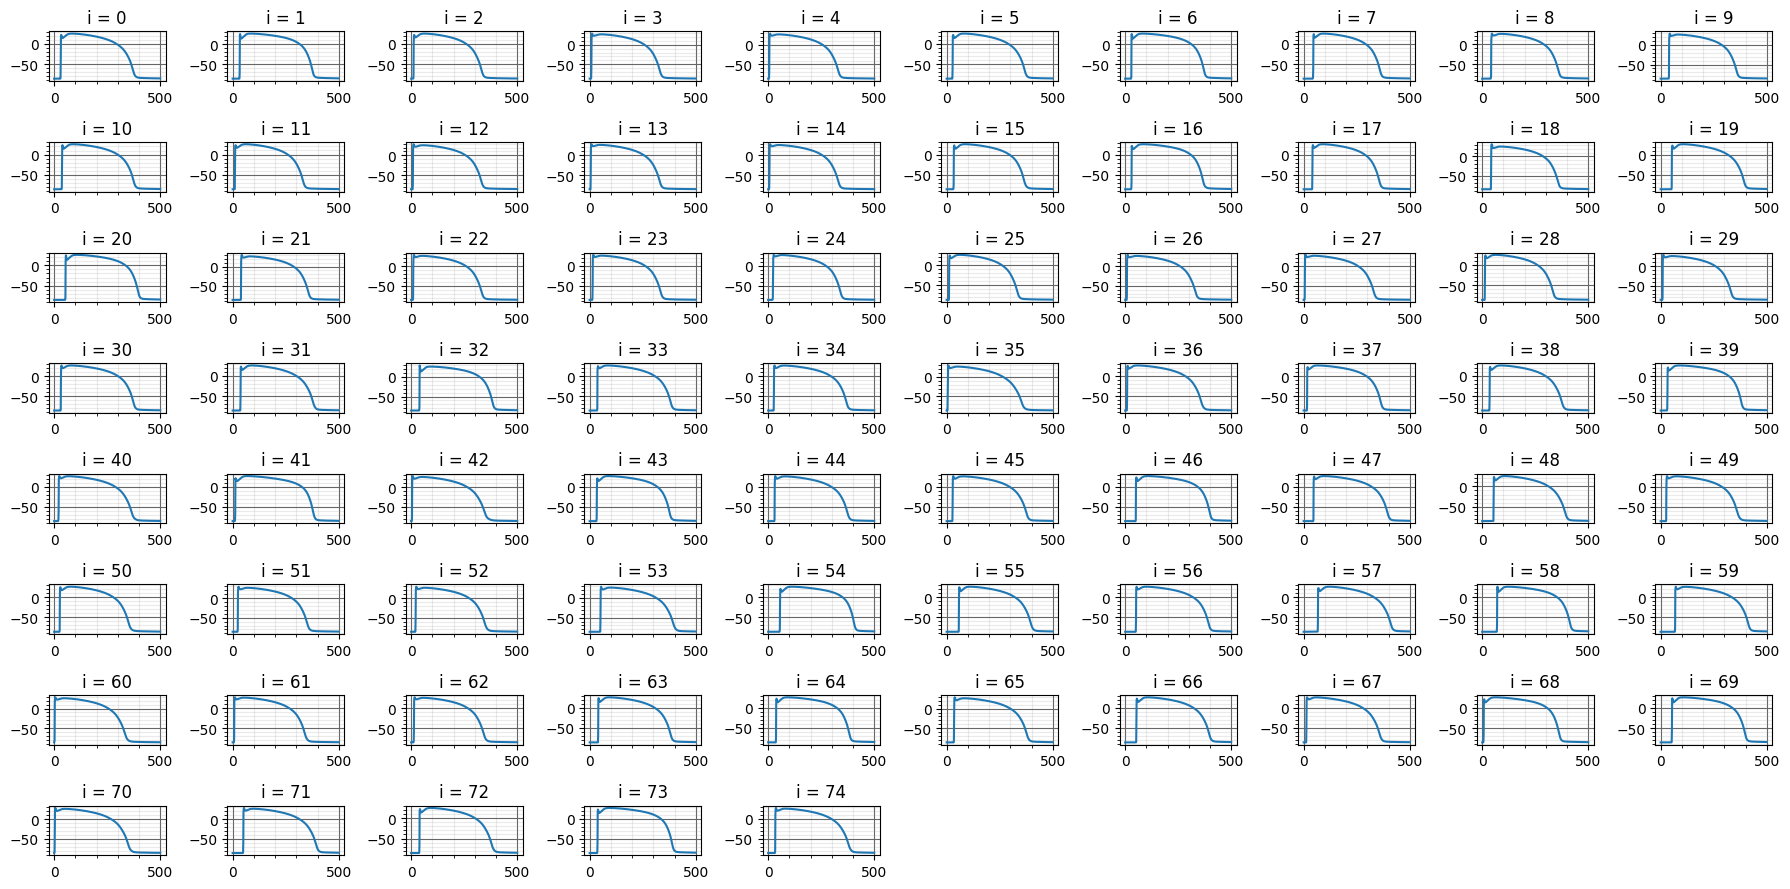

In [46]:
num_timesteps = 500
plt.figure(figsize=(18, 9))
row = 7; column = 10

index = np.random.choice(range(len(file_pairs)),1)
index = [213]

for case in index:
    VmData = np.load(file_pairs[case][1])
    randomIndex = range(VmData.shape[1])
    for count, i in enumerate(randomIndex):
        plt.subplot(8, 10, count + 1)
        plt.plot(VmData[0:num_timesteps,i])
        plt.title(f'i = {i}')
        plt.grid(visible=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

In [47]:
num_sequences = 1
sequence_length = 20
num_features = 12

# pECGData = torch.Tensor(pECGData)
# VmData = torch.Tensor(VmData)

if not isinstance(VmData, torch.Tensor):
    VmData = torch.tensor(VmData)

# Check and print shapes
print("pECGData shape:", pECGData.shape)
print("VmData shape:", VmData.shape)

# sequences, targets = create_sequences(pECGData, VmData, sequence_length)
# print("Sequences shape:", sequences.shape)
# print("Targets shape:", targets.shape)

# dataset = TensorDataset(sequences, targets[:, 0])  # Let's predict the first feature at the next time step
# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32)

pECGData shape: torch.Size([500, 12])
VmData shape: torch.Size([500, 75])


In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
VmData_np = VmData.numpy().reshape(-1, 1)  # Flatten if necessary
VmData_scaled = scaler.fit_transform(VmData_np)
VmData_scaled = torch.tensor(VmData_scaled.reshape(500, 75)) 

In [50]:
def to_sequences(input_data, target_data, seq_length):
    x = []
    y = []
    for i in range(len(input_data) - seq_length):
        x.append(input_data[i:i+seq_length])
        y.append(target_data[i+seq_length])
    return torch.stack(x), torch.stack(y)

# Sequence length
SEQUENCE_LENGTH = 20

x_train, y_train = to_sequences(pECGData, VmData_scaled, SEQUENCE_LENGTH)
print("Training sequences shape:", x_train.shape)
print("Training targets shape:", y_train.shape)

Training sequences shape: torch.Size([480, 20, 12])
Training targets shape: torch.Size([480, 75])


In [51]:
from torch.utils.data import DataLoader, TensorDataset, random_split

# Create TensorDataset
dataset = TensorDataset(x_train, y_train)

# Splitting the dataset into training and testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [53]:
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

def mape(predictions, targets, eps=1e-8):
    return (torch.abs((targets - predictions) / (targets + eps))).mean() * 100

def mae(predictions, targets):
    return torch.abs(predictions - targets).mean()

In [52]:
# Your model definition and training code should follow, ensuring all tensors and models are sent to 'device'
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim=75):
        super(TransformerModel, self).__init__()
        self.input_embed = nn.Linear(input_dim, model_dim)
        self.pos_encoder = nn.Parameter(torch.zeros(1, model_dim))  # Simple positional encoding
        encoder_layers = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.output_layer = nn.Linear(model_dim, output_dim)  # Output to 75 features

    def forward(self, src):
        src = self.input_embed(src) + self.pos_encoder
        output = self.transformer_encoder(src)
        output = output.mean(dim=1)  # Pool over the sequence if needed
        return self.output_layer(output)  # [batch_size, 75]

# Instantiate the model and move it to the appropriate device
model = TransformerModel(input_dim=12, model_dim=512, num_heads=8, num_layers=3, output_dim=75)
model.to(device)

def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for data, target in loader:
        data = data.to(device).float()  # Convert data to float32
        target = target.to(device).float()  # Convert target to float32

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(loader)

# Set up optimizer and criterion
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

# Make sure to convert the DataLoader's dataset to float32 if not already done
# For example, when creating your dataset:
x_train = x_train.float()  # Convert training data to float32
y_train = y_train.float()  # Convert training targets to float32

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Ensure model, criterion, and optimizer are properly set up and run the training
num_epochs = 10
for epoch in range(num_epochs):
    loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f'Epoch {epoch+1}, Loss: {loss:.4f}')



Epoch 1, Loss: 0.9236
Epoch 2, Loss: 0.6650
Epoch 3, Loss: 0.8097
Epoch 4, Loss: 0.7185
Epoch 5, Loss: 0.6784
Epoch 6, Loss: 0.6735
Epoch 7, Loss: 0.6557
Epoch 8, Loss: 0.6059
Epoch 9, Loss: 0.6016
Epoch 10, Loss: 0.6122


In [55]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, targets in loader:
            data, targets = data, targets
            outputs = model(data)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            all_predictions.append(outputs)
            all_targets.append(targets)

    all_predictions = torch.cat(all_predictions)
    all_targets = torch.cat(all_targets)
    
    mse_val = mse(all_predictions, all_targets)
    mape_val = mape(all_predictions, all_targets)
    mae_val = mae(all_predictions, all_targets)
    
    return total_loss / len(loader), mse_val, mape_val, mae_val

# Call the evaluate function during or after training
val_loss, mse_val, mape_val, mae_val = evaluate(model, test_loader, criterion)
print(f"Validation Loss: {val_loss:.4f}")
print(f"MSE: {mse_val:.4f}")
print(f"MAPE: {mape_val:.4f}%")
print(f"MAE: {mae_val:.4f}")

Validation Loss: 0.4651
MSE: 0.4651
MAPE: 95.2617%
MAE: 0.4432
